# 神经网络和机器学习之广告预测

案例说明：Advertising（广告预测），使用全连接神经网络层。

案例选择了keras框架，需要先安装keras和tensorflow。虚谷号教育版已经预装必要的库，可以直接使用。

本案例已经提供了训练好的模型，放在`model`文件夹中，文件名称为：`1-model-vv.h5`。如果想直接测试模型，请跳到“导入模型”或者“应用模型”环节，输入数据开始识别。

## 1.环境搭建

下面是安装命令：

pip install keras

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

建议选择清华源，速度将快很多。参考命令如下：

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 2.数据说明

企业为了提高产品销售额，往往会在各种媒体投入资金展示自己的广告，常见的媒体有电视、广播以及报纸。作为决策者，需要确定在不同媒体的最佳广告投入，以期待最好的产品收益。为了寻求各媒体广告投入与收益之间的关系，还收集到了之前两百个不同产品在各个媒体中的广告投入资金与最终的销售业绩数据，这些数据被制成表格保存在“Advertising.csv”文件中。

数据总共有5列，第1列表示数据的行号，没有列名；第2列到第4列分别是在电视、广播、报纸上的广告投入，最后一列则是对应的销售额。我们让机器学习这一组数据，然后再输入新的数据，让机器来预测可能的销售额。

开始导入数据集吧，数据文件在`data`文件夹中。

`Advertising.csv`文件是以纯文本形式存储表格数据（数字和文本）,文件一共201行，第一行为列名。文本内容如下：

,TV,radio,newspaper,sales

1,230.1,37.8,69.2,22.1

2,44.5,39.3,45.1,10.4

3,17.2,45.9,69.3,9.3

……

In [1]:
import pandas as pd
data=pd.read_csv('./data/Advertising.csv')

用pandas的read_csv功能，读入csv文件中的数据。data是pandas中的DataFrame对象，是一个二维数组。head 和 tail 方法可以分别查看最前面几行和最后面几行的数据（默认为5）。

In [2]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


接下来用pandas的iloc，对数据进行切片。`data.iloc[: , 1:-1]`表示x等于，y=data.iloc[: , -1]

In [4]:
x=data.iloc[: , 1:-1]
y=data.iloc[: , -1]

现在，x与y的形状分别是(200,3)和(200,1)，即x具有200行、3列，y具有200行、1列。其中x是输入的数据(电视、广播、报纸上的广告投入)，y是输出的结果(销售额)。可以输出其中某一行看看。

In [5]:
print(x.values[3])
print(y.values[3])  

[151.5  41.3  58.5]
18.5


In [6]:
data=data.sample(frac=1).reset_index(drop=True)   #打乱数据的先后顺序
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]
x_train,y_train=x[:160],y[:160]
x_val,y_val=x[160:180],y[160:180]
x_test,y_test=x[180:],y[180:]

## 3.建立模型

In [7]:
import keras
from keras import layers

Using TensorFlow backend.


为了调用方便，直接导入了keras的layers子集。keras支持建立序惯模型与函数式模型，在一般情况下，建立一个序贯模型就可以了。接着，为模型添加层，keras支持很多类型的神经网络层，这里使用add方法添加2个全连接神经网络层（Dense层）。

第一层通过input_dim参数指定接收输入数据的维度为3（电视、广播、报纸3列），units=32表示将这个3维数据全连接到32个神经元，并通过relu激活函数进行激活，当然，这一层中的神经元个数并不一定需要设置为32个，但是较多的神经元个数使得模型具有更强的拟合能力；从第二层开始，输入数据维度默认为前一层的输出维度，因此不再需要指定输入数据的维度，只需要指定神经元个数即可，在上述代码中，第一层的32维输出再次全连接到第二层的1个神经元中，最后这1个神经元的输出就是模型的预测结果了。

代码如下：

In [8]:
model=keras.models.Sequential()
model.add(layers.Dense(units=32,input_dim=3,activation='relu'))
model.add(layers.Dense(units=1))

定义好模型的层之后，需要对模型进行编译，同时指定训练模型所需要的优化器以及损失的估算方法。在keras中，可以通过optimizer参数来指定优化器。经验证明，adam优化器具有非常良好的表现。loss='mse'表示使用均方误差（mse）作为损失函数。

In [9]:
# 编译模型
model.compile(optimizer='adam',loss='mse')

最后对模型进行训练，一下代码利用现有数据x和y对模型进行训练1000次，epochs表示训练轮次，batch_size表示每次有多少行数据参与训练，最后把整个训练过程记录到history中。程序运行后，在控制台会打印出每轮次的训练情况。

In [10]:
history=model.fit(x_train,y_train,batch_size=80,epochs=1000,validation_data=(x_val,y_val))

Train on 160 samples, validate on 20 samples
Epoch 1/1000
160/160 [==============================] - 1s 7ms/step - loss: 2323.8715 - val_loss: 2612.5061
Epoch 2/1000
160/160 [==============================] - 0s 182us/step - loss: 2095.5718 - val_loss: 2364.4341
Epoch 3/1000
160/160 [==============================] - 0s 187us/step - loss: 1907.8130 - val_loss: 2123.1221
Epoch 4/1000
160/160 [==============================] - 0s 236us/step - loss: 1715.9583 - val_loss: 1898.7461
Epoch 5/1000
160/160 [==============================] - 0s 188us/step - loss: 1540.6941 - val_loss: 1691.2332
Epoch 6/1000
160/160 [==============================] - 0s 187us/step - loss: 1374.2649 - val_loss: 1501.2092
Epoch 7/1000
160/160 [==============================] - 0s 213us/step - loss: 1227.6837 - val_loss: 1327.0850
Epoch 8/1000
160/160 [==============================] - 0s 205us/step - loss: 1089.5367 - val_loss: 1170.2323
Epoch 9/1000
160/160 [==============================] - 0s 197us/step - loss:

160/160 [==============================] - 0s 215us/step - loss: 34.0912 - val_loss: 35.0171
Epoch 76/1000
160/160 [==============================] - 0s 171us/step - loss: 32.6524 - val_loss: 33.4719
Epoch 77/1000
160/160 [==============================] - 0s 234us/step - loss: 31.3453 - val_loss: 32.1311
Epoch 78/1000
160/160 [==============================] - 0s 199us/step - loss: 30.0326 - val_loss: 30.8799
Epoch 79/1000
160/160 [==============================] - 0s 193us/step - loss: 28.8449 - val_loss: 29.7343
Epoch 80/1000
160/160 [==============================] - 0s 202us/step - loss: 27.6425 - val_loss: 28.6197
Epoch 81/1000
160/160 [==============================] - 0s 188us/step - loss: 26.5045 - val_loss: 27.5366
Epoch 82/1000
160/160 [==============================] - 0s 181us/step - loss: 25.5356 - val_loss: 26.4596
Epoch 83/1000
160/160 [==============================] - 0s 192us/step - loss: 24.6114 - val_loss: 25.4443
Epoch 84/1000
160/160 [============================

160/160 [==============================] - 0s 219us/step - loss: 5.2117 - val_loss: 5.8682
Epoch 152/1000
160/160 [==============================] - 0s 189us/step - loss: 5.1322 - val_loss: 5.8064
Epoch 153/1000
160/160 [==============================] - 0s 225us/step - loss: 5.0600 - val_loss: 5.7488
Epoch 154/1000
160/160 [==============================] - 0s 230us/step - loss: 4.9874 - val_loss: 5.6910
Epoch 155/1000
160/160 [==============================] - 0s 231us/step - loss: 4.9241 - val_loss: 5.6366
Epoch 156/1000
160/160 [==============================] - 0s 242us/step - loss: 4.8520 - val_loss: 5.5769
Epoch 157/1000
160/160 [==============================] - 0s 228us/step - loss: 4.7813 - val_loss: 5.5205
Epoch 158/1000
160/160 [==============================] - 0s 240us/step - loss: 4.7213 - val_loss: 5.4641
Epoch 159/1000
160/160 [==============================] - 0s 247us/step - loss: 4.6560 - val_loss: 5.4153
Epoch 160/1000
160/160 [==============================] - 0s 

Epoch 228/1000
160/160 [==============================] - 0s 218us/step - loss: 3.0102 - val_loss: 3.5879
Epoch 229/1000
160/160 [==============================] - 0s 195us/step - loss: 3.0075 - val_loss: 3.5793
Epoch 230/1000
160/160 [==============================] - 0s 191us/step - loss: 3.0008 - val_loss: 3.5671
Epoch 231/1000
160/160 [==============================] - 0s 226us/step - loss: 2.9975 - val_loss: 3.5591
Epoch 232/1000
160/160 [==============================] - 0s 180us/step - loss: 2.9884 - val_loss: 3.5512
Epoch 233/1000
160/160 [==============================] - 0s 188us/step - loss: 2.9888 - val_loss: 3.5436
Epoch 234/1000
160/160 [==============================] - 0s 213us/step - loss: 2.9787 - val_loss: 3.5324
Epoch 235/1000
160/160 [==============================] - 0s 208us/step - loss: 2.9726 - val_loss: 3.5237
Epoch 236/1000
160/160 [==============================] - 0s 218us/step - loss: 2.9698 - val_loss: 3.5144
Epoch 237/1000
160/160 [======================

Epoch 305/1000
160/160 [==============================] - 0s 208us/step - loss: 2.7035 - val_loss: 2.9834
Epoch 306/1000
160/160 [==============================] - 0s 239us/step - loss: 2.7017 - val_loss: 2.9786
Epoch 307/1000
160/160 [==============================] - 0s 234us/step - loss: 2.6971 - val_loss: 2.9706
Epoch 308/1000
160/160 [==============================] - 0s 215us/step - loss: 2.6949 - val_loss: 2.9636
Epoch 309/1000
160/160 [==============================] - 0s 240us/step - loss: 2.6911 - val_loss: 2.9588
Epoch 310/1000
160/160 [==============================] - 0s 226us/step - loss: 2.6882 - val_loss: 2.9530
Epoch 311/1000
160/160 [==============================] - 0s 191us/step - loss: 2.6850 - val_loss: 2.9465
Epoch 312/1000
160/160 [==============================] - 0s 190us/step - loss: 2.6848 - val_loss: 2.9395
Epoch 313/1000
160/160 [==============================] - 0s 196us/step - loss: 2.6781 - val_loss: 2.9322
Epoch 314/1000
160/160 [======================

160/160 [==============================] - 0s 223us/step - loss: 2.4908 - val_loss: 2.5936
Epoch 383/1000
160/160 [==============================] - 0s 230us/step - loss: 2.4854 - val_loss: 2.5878
Epoch 384/1000
160/160 [==============================] - 0s 222us/step - loss: 2.4833 - val_loss: 2.5826
Epoch 385/1000
160/160 [==============================] - 0s 212us/step - loss: 2.4813 - val_loss: 2.5777
Epoch 386/1000
160/160 [==============================] - 0s 222us/step - loss: 2.4795 - val_loss: 2.5717
Epoch 387/1000
160/160 [==============================] - 0s 207us/step - loss: 2.4751 - val_loss: 2.5651
Epoch 388/1000
160/160 [==============================] - 0s 281us/step - loss: 2.4731 - val_loss: 2.5605
Epoch 389/1000
160/160 [==============================] - 0s 199us/step - loss: 2.4697 - val_loss: 2.5548
Epoch 390/1000
160/160 [==============================] - 0s 202us/step - loss: 2.4683 - val_loss: 2.5462
Epoch 391/1000
160/160 [==============================] - 0s 

160/160 [==============================] - 0s 207us/step - loss: 2.2953 - val_loss: 2.2970
Epoch 460/1000
160/160 [==============================] - 0s 190us/step - loss: 2.2920 - val_loss: 2.2935
Epoch 461/1000
160/160 [==============================] - 0s 203us/step - loss: 2.2904 - val_loss: 2.2888
Epoch 462/1000
160/160 [==============================] - 0s 230us/step - loss: 2.2874 - val_loss: 2.2856
Epoch 463/1000
160/160 [==============================] - 0s 203us/step - loss: 2.2850 - val_loss: 2.2820
Epoch 464/1000
160/160 [==============================] - 0s 197us/step - loss: 2.2847 - val_loss: 2.2790
Epoch 465/1000
160/160 [==============================] - 0s 195us/step - loss: 2.2803 - val_loss: 2.2744
Epoch 466/1000
160/160 [==============================] - 0s 198us/step - loss: 2.2786 - val_loss: 2.2718
Epoch 467/1000
160/160 [==============================] - 0s 170us/step - loss: 2.2769 - val_loss: 2.2661
Epoch 468/1000
160/160 [==============================] - 0s 

/usr/local/lib/python3.5/dist-packages/Keras-2.2.4-py3.5.egg/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102107). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 496/1000
160/160 [==============================] - 0s 239us/step - loss: 2.2023 - val_loss: 2.1554
Epoch 497/1000
160/160 [==============================] - 0s 222us/step - loss: 2.2038 - val_loss: 2.1561
Epoch 498/1000
160/160 [==============================] - 0s 213us/step - loss: 2.1950 - val_loss: 2.1553
Epoch 499/1000
160/160 [==============================] - 0s 206us/step - loss: 2.1917 - val_loss: 2.1496
Epoch 500/1000
160/160 [==============================] - 0s 222us/step - loss: 2.1919 - val_loss: 2.1453
Epoch 501/1000
160/160 [==============================] - 0s 215us/step - loss: 2.1863 - val_loss: 2.1398
Epoch 502/1000
160/160 [==============================] - 0s 211us/step - loss: 2.1835 - val_loss: 2.1352
Epoch 503/1000
160/160 [==============================] - 0s 202us/step - loss: 2.1803 - val_loss: 2.1362
Epoch 504/1000
160/160 [==============================] - 0s 237us/step - loss: 2.1750 - val_loss: 2.1325
Epoch 505/1000
160/160 [======================

Epoch 573/1000
160/160 [==============================] - 0s 185us/step - loss: 1.9123 - val_loss: 1.8957
Epoch 574/1000
160/160 [==============================] - 0s 200us/step - loss: 1.9035 - val_loss: 1.8923
Epoch 575/1000
160/160 [==============================] - 0s 195us/step - loss: 1.9018 - val_loss: 1.8842
Epoch 576/1000
160/160 [==============================] - 0s 190us/step - loss: 1.8960 - val_loss: 1.8797
Epoch 577/1000
160/160 [==============================] - 0s 203us/step - loss: 1.8956 - val_loss: 1.8761
Epoch 578/1000
160/160 [==============================] - 0s 194us/step - loss: 1.8923 - val_loss: 1.8723
Epoch 579/1000
160/160 [==============================] - 0s 218us/step - loss: 1.8872 - val_loss: 1.8682
Epoch 580/1000
160/160 [==============================] - 0s 250us/step - loss: 1.8839 - val_loss: 1.8652
Epoch 581/1000
160/160 [==============================] - 0s 219us/step - loss: 1.8827 - val_loss: 1.8616
Epoch 582/1000
160/160 [======================

160/160 [==============================] - 0s 177us/step - loss: 1.6873 - val_loss: 1.6281
Epoch 651/1000
160/160 [==============================] - 0s 192us/step - loss: 1.6845 - val_loss: 1.6209
Epoch 652/1000
160/160 [==============================] - 0s 174us/step - loss: 1.6794 - val_loss: 1.6163
Epoch 653/1000
160/160 [==============================] - 0s 175us/step - loss: 1.6819 - val_loss: 1.6141
Epoch 654/1000
160/160 [==============================] - 0s 198us/step - loss: 1.6765 - val_loss: 1.6106
Epoch 655/1000
160/160 [==============================] - 0s 187us/step - loss: 1.6712 - val_loss: 1.6100
Epoch 656/1000
160/160 [==============================] - 0s 183us/step - loss: 1.6702 - val_loss: 1.6081
Epoch 657/1000
160/160 [==============================] - 0s 194us/step - loss: 1.6676 - val_loss: 1.6047
Epoch 658/1000
160/160 [==============================] - 0s 193us/step - loss: 1.6638 - val_loss: 1.6000
Epoch 659/1000
160/160 [==============================] - 0s 

160/160 [==============================] - 0s 260us/step - loss: 1.4994 - val_loss: 1.4083
Epoch 728/1000
160/160 [==============================] - 0s 250us/step - loss: 1.4944 - val_loss: 1.4074
Epoch 729/1000
160/160 [==============================] - 0s 245us/step - loss: 1.4963 - val_loss: 1.4082
Epoch 730/1000
160/160 [==============================] - 0s 230us/step - loss: 1.4912 - val_loss: 1.4014
Epoch 731/1000
160/160 [==============================] - 0s 220us/step - loss: 1.4868 - val_loss: 1.3999
Epoch 732/1000
160/160 [==============================] - 0s 241us/step - loss: 1.4904 - val_loss: 1.4003
Epoch 733/1000
160/160 [==============================] - 0s 254us/step - loss: 1.4874 - val_loss: 1.3979
Epoch 734/1000
160/160 [==============================] - 0s 255us/step - loss: 1.4832 - val_loss: 1.3971
Epoch 735/1000
160/160 [==============================] - 0s 269us/step - loss: 1.4790 - val_loss: 1.3937
Epoch 736/1000
160/160 [==============================] - 0s 

160/160 [==============================] - 0s 204us/step - loss: 1.3272 - val_loss: 1.2229
Epoch 805/1000
160/160 [==============================] - 0s 189us/step - loss: 1.3267 - val_loss: 1.2226
Epoch 806/1000
160/160 [==============================] - 0s 212us/step - loss: 1.3232 - val_loss: 1.2173
Epoch 807/1000
160/160 [==============================] - 0s 206us/step - loss: 1.3247 - val_loss: 1.2171
Epoch 808/1000
160/160 [==============================] - 0s 191us/step - loss: 1.3212 - val_loss: 1.2142
Epoch 809/1000
160/160 [==============================] - 0s 202us/step - loss: 1.3157 - val_loss: 1.2152
Epoch 810/1000
160/160 [==============================] - 0s 194us/step - loss: 1.3150 - val_loss: 1.2171
Epoch 811/1000
160/160 [==============================] - 0s 208us/step - loss: 1.3144 - val_loss: 1.2102
Epoch 812/1000
160/160 [==============================] - 0s 201us/step - loss: 1.3111 - val_loss: 1.2057
Epoch 813/1000
160/160 [==============================] - 0s 

160/160 [==============================] - 0s 236us/step - loss: 1.1770 - val_loss: 1.0538
Epoch 882/1000
160/160 [==============================] - 0s 230us/step - loss: 1.1873 - val_loss: 1.0676
Epoch 883/1000
160/160 [==============================] - 0s 244us/step - loss: 1.1775 - val_loss: 1.0547
Epoch 884/1000
160/160 [==============================] - 0s 257us/step - loss: 1.1872 - val_loss: 1.0529
Epoch 885/1000
160/160 [==============================] - 0s 249us/step - loss: 1.1736 - val_loss: 1.0472
Epoch 886/1000
160/160 [==============================] - 0s 188us/step - loss: 1.1649 - val_loss: 1.0491
Epoch 887/1000
160/160 [==============================] - 0s 208us/step - loss: 1.1660 - val_loss: 1.0531
Epoch 888/1000
160/160 [==============================] - 0s 201us/step - loss: 1.1663 - val_loss: 1.0438
Epoch 889/1000
160/160 [==============================] - 0s 219us/step - loss: 1.1604 - val_loss: 1.0391
Epoch 890/1000
160/160 [==============================] - 0s 

Epoch 958/1000
160/160 [==============================] - 0s 185us/step - loss: 1.0521 - val_loss: 0.9131
Epoch 959/1000
160/160 [==============================] - 0s 195us/step - loss: 1.0471 - val_loss: 0.9119
Epoch 960/1000
160/160 [==============================] - 0s 206us/step - loss: 1.0477 - val_loss: 0.9260
Epoch 961/1000
160/160 [==============================] - 0s 205us/step - loss: 1.0446 - val_loss: 0.9154
Epoch 962/1000
160/160 [==============================] - 0s 196us/step - loss: 1.0381 - val_loss: 0.9087
Epoch 963/1000
160/160 [==============================] - 0s 214us/step - loss: 1.0513 - val_loss: 0.9092
Epoch 964/1000
160/160 [==============================] - 0s 193us/step - loss: 1.0377 - val_loss: 0.9105
Epoch 965/1000
160/160 [==============================] - 0s 197us/step - loss: 1.0337 - val_loss: 0.9113
Epoch 966/1000
160/160 [==============================] - 0s 191us/step - loss: 1.0338 - val_loss: 0.9038
Epoch 967/1000
160/160 [======================

从输出的数据可以看出：一开始，loss的值非常大，而随着训练不断的进行，loss在逐渐减小。loss是我们预先设定的损失函数计算得到的损失值,val_loss是测试集的损失值，数字越小，说明模型的识别精度越好。

**知识链接**

history是keras的一个专用对象——History类。History类对象包含两个属性，分别为epoch和history。epoch为训练轮数，而history并不固定，由编译模型（compile）时的参数决定。

In [11]:
print(history.history)

{'loss': [2323.8714599609375, 2095.5718383789062, 1907.81298828125, 1715.9583129882812, 1540.694091796875, 1374.264892578125, 1227.6837158203125, 1089.5366516113281, 966.9758605957031, 862.3857421875, 763.4689025878906, 677.3984375, 607.1590881347656, 547.5772552490234, 488.45751953125, 442.74070739746094, 404.39637756347656, 373.260498046875, 347.7055969238281, 326.11509704589844, 308.02052307128906, 295.4550476074219, 282.4314422607422, 272.6534881591797, 264.2041473388672, 255.93704986572266, 249.28530883789062, 242.765625, 235.99964141845703, 230.54686737060547, 223.86456298828125, 217.66085052490234, 211.7111358642578, 205.2708282470703, 198.9144287109375, 192.65232849121094, 186.177978515625, 180.2510757446289, 173.58940887451172, 167.49867248535156, 161.7417755126953, 155.7442169189453, 150.35115814208984, 144.62525177001953, 139.06281661987305, 133.81660842895508, 128.53779220581055, 123.48653411865234, 119.25614166259766, 114.4974250793457, 110.13480758666992, 105.802970886230

输出history，我们可以发现history的值是字典类型（dict），key为`loss`和`val_loss`，`loss`的值为列表。用`history.history['loss'][0]`得到其中的某一个值。

In [12]:
print(history.history['loss'][0])

2323.8714599609375


将history中的数据通过matplotlib绘图表现出来，能够更加直观地看出loss的变化规律。因为在jupyter上调试，代码中加入%matplotlib inline命令，让图片输出在网页中。下面的图中，将训练过程中的训练集loss以及验证集loss全部输出，并打印出测试集的loss。

20/20 [==============================] - 0s 201us/step
test_loss: 1.0507547855377197


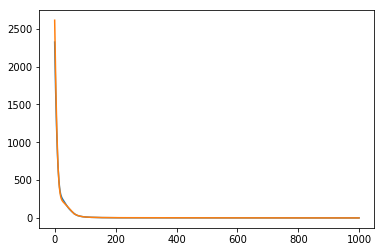

In [18]:
#将图片内嵌在交互窗口，而不是弹出一个图片窗口
%matplotlib inline 
import matplotlib.pyplot as plt
t=len(history.history['loss'])
plt.plot(range(t),history.history['loss'])
plt.plot(range(t),history.history['val_loss'])
print("test_loss:",model.evaluate(x_test,y_test))

我们如何评价一个模型训练是否成功？首先，训练过程中训练集loss要下降到一个较小的值，表示模型收敛较好，没有欠拟合；其次，测试集loss最后与训练集loss要尽可能相似，差距越小越好小，说明该模型没有过拟合。

当一个神经网络模型成功训练出来后，便可以使用该模型进行预测了。通过pandas的DataFrame方法构造x_input，并使用模型的`predict`方法进行预测。这里的数据是根据`Advertising.csv`的前三条略加修改的，可以看看这个模型输出的结果与真实结果（sales列）是否一致。

In [19]:
#用字典生成的DataFrame，需要指定一下列的次序
d={'TV':[230,44,17],'radio':[37,39,45],'newspaper':[69,45,69]}
x_input=pd.DataFrame(d,columns=['TV','radio','newspaper'])
model.predict(x_input)

array([[21.8746  ],
       [10.844945],
       [ 8.222065]], dtype=float32)

In [20]:
x_input

,TV,radio,newspaper
0,230,37,69
1,44,39,45
2,17,45,69


用输出来的结果和前三条数据比较（原来数据中的`sales`分别为：22，10，9），看起来效果还是不错的。

## 4.保存模型

训练出来的模型，可以保存。下次使用的时候载入，还可以继续训练。一般保存为h5格式，需要先安装h5py。

命令如下：pip install h5py

In [22]:
model.save('./model/1-model-vv.h5')   # HDF5文件

## 5.应用模型

使用keras.models的load_model语句载入模型，就可以直接用这个模型来做预测了。

In [23]:
from keras.models import load_model
import pandas as pd
model = load_model('./model/1-model-vv.h5')

这段代码将在`data`文件夹中生成一个名为`test.csv`的文件。

In [24]:
%%writefile ./data/test.csv
TV,radio,newspaper
230.0,37.0,69.0
44,39,45
17,45,69
283.1,42.1,66.1
232.1,8.6,8.7

Overwriting ./data/test.csv


In [25]:
#读取数据，并且输出预测结果
x_input=pd.read_csv('./data/test.csv')
model.predict(x_input)

array([[21.279892],
       [10.489032],
       [ 9.173268],
       [24.312817],
       [13.093816]], dtype=float32)

**注：**可以导入模型后，继续训练，直到loss不会继续变小。